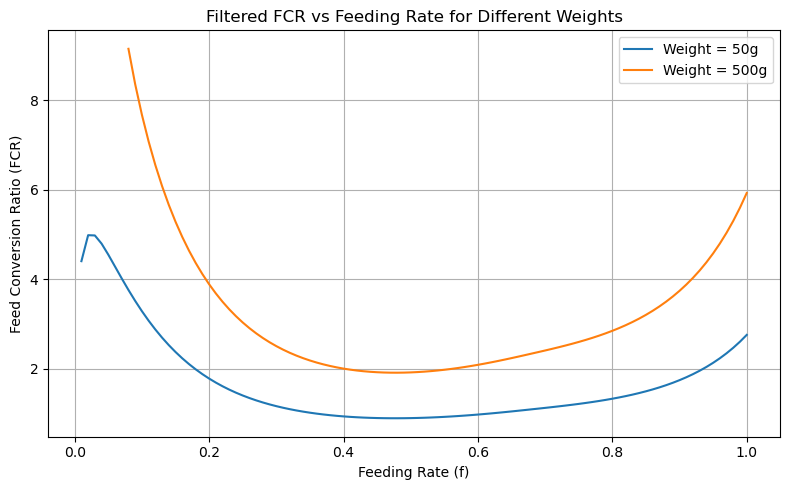

In [33]:
from model.individual_growth_model import IndividualGrowthModel
from utils.calculation import Calculation
import math
import numpy as np
import matplotlib.pyplot as plt

model = IndividualGrowthModel()

# Constants
T = 30
DO = 1.5
UIA = 0.03

# Range of feed rates
feeding_rates = np.linspace(0.01, 1.0, 100)  # Avoid zero to prevent division by zero

# FCR calculations for two weights
initial_weight_50 = 50
initial_weight_500 = 500
days = 1

fcr_w50 = []
fcr_w500 = []
valid_fcr_w50 = []
valid_fcr_w500 = []
valid_feed_rates_w50 = []
valid_feed_rates_w500 = []

for f in feeding_rates:
    # For weight 50g
    growth_50 = model.compute_growth(f, T, DO, UIA, initial_weight_50) * days
    final_weight_50 = initial_weight_50 + growth_50
    feed_given_50 = Calculation.compute_feed_weight(f, initial_weight_50) * days
    fcr_50 = Calculation.compute_fcr(feed_given_50, final_weight_50, initial_weight_50)

    if fcr_50 is not None and 0 < fcr_50 < 10:  # Acceptable range for plotting
        valid_feed_rates_w50.append(f)
        valid_fcr_w50.append(fcr_50)

    # For weight 500g
    growth_500 = model.compute_growth(f, T, DO, UIA, initial_weight_500) * days
    final_weight_500 = initial_weight_500 + growth_500
    feed_given_500 = Calculation.compute_feed_weight(f, initial_weight_500) * days
    fcr_500 = Calculation.compute_fcr(feed_given_500, final_weight_500, initial_weight_500)

    if fcr_500 is not None and 0 < fcr_500 < 10:
        valid_feed_rates_w500.append(f)
        valid_fcr_w500.append(fcr_500)

# Plot FCR
plt.figure(figsize=(8, 5))
plt.plot(valid_feed_rates_w50, valid_fcr_w50, label='Weight = 50g')
plt.plot(valid_feed_rates_w500, valid_fcr_w500, label='Weight = 500g')
plt.xlabel("Feeding Rate (f)")
plt.ylabel("Feed Conversion Ratio (FCR)")
plt.title("Filtered FCR vs Feeding Rate for Different Weights")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
from model.reward_cost import RewardCost

regions = ["guangdong", "north_sulawesi", "kafr_el_sheikh"]
biomass_prev = 100
biomass_curr = 120
feed_weight = 2962.90 / 1000
delta_T = 3
DO_level = 1

for region in regions:
    reward = RewardCost(region=region)

    val_gain = reward.fish_value_gain(biomass_prev=biomass_prev, biomass_curr=biomass_curr)
    feed_cst = reward.feed_cost(feed_weight=feed_weight)
    heat_cst = reward.heat_cost(delta_T=delta_T)
    oxy_cst = reward.oxygenation_cost(DO_level=DO_level)
    net_reward = val_gain - feed_cst - heat_cst - oxy_cst

    print(f"\nRegion: {region}")
    print("Fish Value Gain:", val_gain)
    print("Feed Cost:", feed_cst)
    print("Heat Cost:", heat_cst)
    print("Oxygenation Cost:", oxy_cst)
    print("Net Reward:", net_reward)


Region: guangdong
Fish Value Gain: 75.6
Feed Cost: 3.3184480000000005
Heat Cost: 0.308
Oxygenation Cost: 0.215424
Net Reward: 71.75812799999999

Region: north_sulawesi
Fish Value Gain: 62.0
Feed Cost: 3.8221410000000007
Heat Cost: 0.023799999999999998
Oxygenation Cost: 0.0166464
Net Reward: 58.1374126

Region: kafr_el_sheikh
Fish Value Gain: 68.0
Feed Cost: 1.6295950000000003
Heat Cost: 0.1645
Oxygenation Cost: 0.115056
Net Reward: 66.090849
